In [1]:
import random
import copy   
import sys    
import numpy as np

In [2]:
#-------fitness functions---------

def rastrigin(x, A=10):
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])
 
#sphere function
def sphere(x):
    return sum([xi**2 for xi in x])
#-------------------------

In [3]:
class Particle:
    def __init__(self, bounds):
        self.position = np.array([random.uniform(bound[0], bound[1]) for bound in bounds])
        self.velocity = np.array([random.uniform(-1, 1) for b in bounds])
        self.best_position = np.copy(self.position)
        self.best_value = float('inf')

class PSO:
    def __init__(self, bounds, num_particles, num_iterations):
        self.bounds = bounds
        self.num_particles = num_particles
        self.num_iterations = num_iterations
        self.global_best_value = float('inf')
        self.global_best_position = None
        self.swarm = [Particle(bounds) for p in range(num_particles)]
        self.history = []

    def optimize(self):
        for iteration in range(self.num_iterations):
            for particle in self.swarm:
                # Update personal best
                value = rastrigin(particle.position)
                if value < particle.best_value:
                    particle.best_value = value
                    particle.best_position = np.copy(particle.position)
                
                # Update global best
                if value < self.global_best_value:
                    self.global_best_value = value
                    self.global_best_position = np.copy(particle.position)
            
            for particle in self.swarm:
                # Update velocity and position
                inertia_weight = 0.6
                alpha1 = 2.0
                alpha2 = 2.0

                r1 = random.random()
                r2 = random.random()
                
                cognitive_velocity = alpha1 * r1 * (particle.best_position - particle.position)
                social_velocity = alpha2 * r2 * (self.global_best_position - particle.position)
                particle.velocity = inertia_weight * particle.velocity + cognitive_velocity + social_velocity

                particle.position = np.clip(particle.position + particle.velocity, [bound[0] for bound in self.bounds], [bound[1] for bound in self.bounds])

            # Print best value at each iteration
            print(f"Iteration {iteration+1}/{self.num_iterations}, best value: {self.global_best_value}")
            self.history.append((iteration+1,self.global_best_value))

        return self.global_best_position, self.global_best_value, self.history

In [4]:
def pso_rastrigin(pop_size):
    # Define the bounds of the search-space (for a 3D version of Rastrigin)
    bounds = [( -10.0, 10.0)] * 2 

    # Create the PSO instance
    pso = PSO(bounds=bounds, num_particles=pop_size, num_iterations=200)

    # Perform the optimization
    best_position, best_value, history = pso.optimize()
    return best_position, best_value, history
    print(f"The best position found is {best_position} with a value of {best_value}")

In [5]:
best_values = []
for population_size in range(10,100,10):
    best_position, best_value, _ = pso_rastrigin(population_size)
    best_values.append(best_value)


fig2, ax2 = plt.subplots(figsize=(12,8))
ax2.plot(list(range(10,100,10)),best_values)
ax2.set_xlabel('Population Size')
ax2.set_ylabel('Best Fitness value')
ax2.set_title('Fitness value History (Rastrigin Function)')
ax2.legend()

Iteration 1/200, best value: 31.803072434196388
Iteration 2/200, best value: 12.172880013964132
Iteration 3/200, best value: 12.172880013964132
Iteration 4/200, best value: 12.172880013964132
Iteration 5/200, best value: 12.172880013964132
Iteration 6/200, best value: 3.5789407823558506
Iteration 7/200, best value: 3.5789407823558506
Iteration 8/200, best value: 3.5789407823558506
Iteration 9/200, best value: 3.5789407823558506
Iteration 10/200, best value: 3.5789407823558506
Iteration 11/200, best value: 2.1379386918657843
Iteration 12/200, best value: 2.1379386918657843
Iteration 13/200, best value: 2.1379386918657843
Iteration 14/200, best value: 1.0391991856977683
Iteration 15/200, best value: 1.0391991856977683
Iteration 16/200, best value: 1.0391991856977683
Iteration 17/200, best value: 1.0391991856977683
Iteration 18/200, best value: 1.0391991856977683
Iteration 19/200, best value: 1.0391991856977683
Iteration 20/200, best value: 1.0391991856977683
Iteration 21/200, best value:

NameError: name 'plt' is not defined

: 

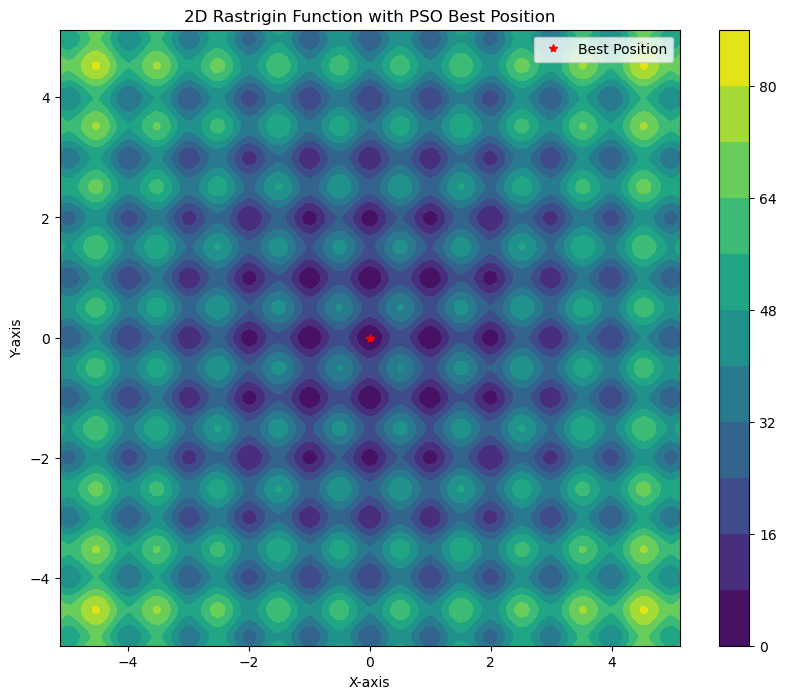

In [93]:
import matplotlib.pyplot as plt
from matplotlib import cm

# Define the Rastrigin function for 2D
def rastrigin_2d(x, y, A=10):
    return A * 2 + (x ** 2 - A * np.cos(2 * np.pi * x)) + (y ** 2 - A * np.cos(2 * np.pi * y))

# Create a grid of points
X = np.linspace(-5.12, 5.12, 500)
Y = np.linspace(-5.12, 5.12, 500)
X, Y = np.meshgrid(X, Y)
Z = rastrigin_2d(X, Y)

# Plot the Rastrigin function
fig, ax = plt.subplots(figsize=(10, 8))
# contour = ax.contourf(X, Y, Z, cmap=cm.viridis)
contour = ax.contourf(X, Y, Z, 10, cmap=cm.viridis)

# Overlay the best position found by the PSO algorithm
# For demonstration purposes, let's assume the PSO found the minimum at the origin for the Rastrigin function

ax.plot(best_position[0], best_position[1], 'r*', markersize=6, label='Best Position')

# Add a color bar and labels
fig.colorbar(contour)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('2D Rastrigin Function with PSO Best Position')

# Show the legend
ax.legend()

# Show the plot
plt.show()
fig.savefig('rastrigin_2d.png')
